In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

### Garment Worker Productivity
   
####   Data Description
    01 date : Date in MM-DD-YYYY
    02 day : Day of the Week
    03 quarter : A portion of the month. A month was divided into four quarters
    04 department : Associated department with the instance
    05 team_no : Associated team number with the instance
    06 no_of_workers : Number of workers in each team
    07 no_of_style_change : Number of changes in the style of a particular product
    08 targeted_productivity : Targeted productivity set by the Authority for each team for each day.
    09 smv : Standard Minute Value, it is the allocated time for a task
    10 wip : Work in progress. Includes the number of unfinished items for products
    11 over_time : Represents the amount of overtime by each team in minutes
    12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
    13 idle_time : The amount of time when the production was interrupted due to several reasons
    14 idle_men : The number of workers who were idle due to production interruption
    15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [89]:
garment_worker_df = pd.read_csv("garments_worker_productivity.csv")

In [90]:
garment_worker_df['Class'] = [1 if i > 0.5 else 0 for i in garment_worker_df.actual_productivity]

In [91]:
garment_worker_df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,Class
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1


In [92]:
garment_worker_df.drop('actual_productivity',inplace=True,axis=1)

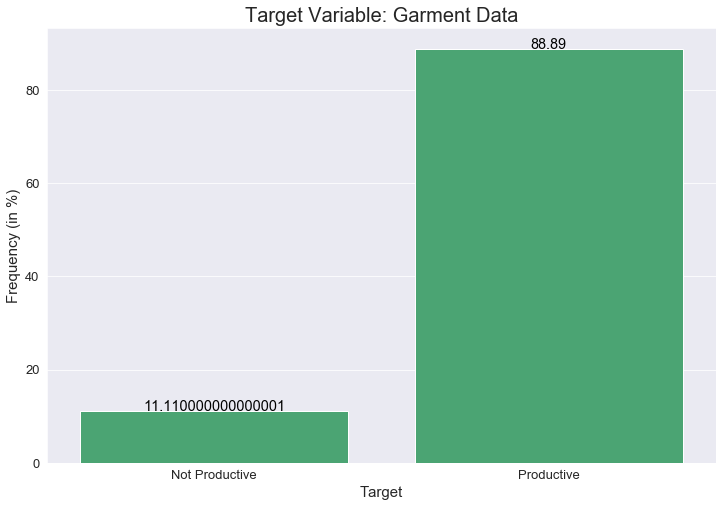

In [93]:
groupedvalues = garment_worker_df['Class'].value_counts(normalize=True,ascending=True).reset_index()

groupedvalues['Class'] = round(groupedvalues['Class'],4)*100



plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
bar=sns.barplot('index','Class',data=groupedvalues,color="mediumseagreen")
plt.title('Target Variable: Garment Data',fontsize=20)
plt.xlabel("Target",fontsize=15)
plt.ylabel("Frequency (in %)",fontsize=15)
plt.xticks(ticks = [0,1] , labels = ['Not Productive',"Productive"],fontsize=13)
plt.yticks(fontsize=13)
for index,row in groupedvalues.iterrows():
    bar.text(row.name,row.Class,row.Class,color='black',ha='center',size='large')


fig = bar.get_figure()
fig.savefig("output_tmp.png")

Data is Imablanced from the above graph we can see that.

In [94]:
garment_worker_df.shape # 1197 rows and 15 features we have

(1197, 15)

In [95]:
garment_worker_df.isna().sum() # Checking Na Values

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
Class                      0
dtype: int64

In [96]:
garment_worker_df.wip.fillna(0,inplace=True)

In [97]:
categorical_features = [ i for i in garment_worker_df.columns if garment_worker_df[i].dtype=='O']

In [98]:
for attribute in categorical_features:
    print(attribute)
    print(garment_worker_df[attribute].value_counts())
    print(" ")

date
1/31/2015    24
3/11/2015    24
3/10/2015    23
1/24/2015    23
1/12/2015    23
1/11/2015    23
1/7/2015     22
1/22/2015    22
3/9/2015     22
1/10/2015    22
1/5/2015     22
3/8/2015     22
3/3/2015     22
1/13/2015    22
1/8/2015     22
2/28/2015    21
1/17/2015    21
1/6/2015     21
1/14/2015    21
3/4/2015     21
2/26/2015    21
1/28/2015    21
1/4/2015     21
1/3/2015     21
1/27/2015    21
2/25/2015    21
1/25/2015    21
2/18/2015    21
2/17/2015    20
3/1/2015     20
2/22/2015    20
2/19/2015    20
1/29/2015    20
3/2/2015     20
1/15/2015    19
1/19/2015    19
1/1/2015     19
1/18/2015    19
2/23/2015    19
3/7/2015     19
2/11/2015    19
2/7/2015     19
2/8/2015     19
2/1/2015     19
1/26/2015    19
2/12/2015    19
2/10/2015    19
2/24/2015    19
2/4/2015     19
2/3/2015     19
1/21/2015    19
3/5/2015     19
2/2/2015     19
2/15/2015    19
2/16/2015    18
2/9/2015     18
2/5/2015     18
2/14/2015    17
1/20/2015    15
Name: date, dtype: int64
 
quarter
Quarter1    360


In [99]:
for attribute in categorical_features: # Label Encoding
    label_encoder = LabelEncoder()
    garment_worker_df[attribute]=label_encoder.fit_transform(garment_worker_df[attribute])

In [100]:
garment_worker_df.Class.value_counts()

1    1064
0     133
Name: Class, dtype: int64

In [101]:
# Random Over sampling
count_1, count_0 = garment_worker_df['Class'].value_counts()

In [102]:
# Separate class
class_0_data = garment_worker_df[garment_worker_df['Class'] == 0]
class_1_data = garment_worker_df[garment_worker_df['Class'] == 1]# print the shape of the class
print('class 0:', class_0_data.shape)
print('class 1:', class_1_data.shape)

class 0: (133, 15)
class 1: (1064, 15)


In [103]:
class_0_over_sampling = class_0_data.sample(count_1, replace=True)

print(class_0_over_sampling.shape)
over_sample_data = pd.concat([class_0_over_sampling, class_1_data], axis=0)

(1064, 15)


### Modeling : Random Forest on the Base Dataset

In [104]:
X = over_sample_data.drop('Class',1) # Independent Variables
y = over_sample_data.Class # Dependent Variables

In [105]:
scaler = StandardScaler() # Scaling feature

X = scaler.fit_transform(X)

In [106]:
# Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [107]:
random_forest_model = RandomForestClassifier(random_state=40) # Random Forest Classifier

In [108]:
random_forest_model.fit(X_train,y_train) # Fitting the Model

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [109]:
y_pred = random_forest_model.predict(X_test) # Predicting on test dataset

In [110]:
print(classification_report(y_test,y_pred)) # Classification report

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       362
           1       1.00      0.91      0.95       341

    accuracy                           0.95       703
   macro avg       0.96      0.95      0.95       703
weighted avg       0.96      0.95      0.95       703



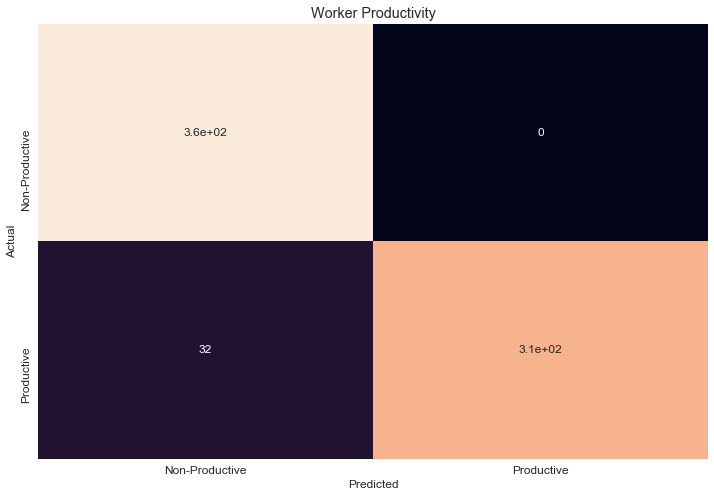

In [111]:
plt.figure(figsize=(12,8))
sns_plot = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False,xticklabels=['Non-Productive','Productive'],yticklabels=['Non-Productive','Productive'])
plt.title("Worker Productivity")
plt.xlabel("Predicted")
plt.ylabel("Actual")
fig = sns_plot.get_figure()
fig.savefig("plot1.jpg")
plt.show()

In [112]:
print(confusion_matrix(y_test,y_pred)) # Confusion Matrix

[[362   0]
 [ 32 309]]


In [113]:
print(f"Accuracy for the Random Forest Classifier on test Data: {round(accuracy_score(y_test,y_pred),4)*100} %") # Test Accuracy

Accuracy for the Random Forest Classifier on test Data: 95.45 %


In [114]:
print(f"Accuracy for the Random Forest Classifier on train Data: {round(random_forest_model.score(X_train,y_train),2)*100} %") # Test Accuracy

Accuracy for the Random Forest Classifier on train Data: 99.0 %


In [115]:
def evaluate_model(y_pred, probs,train_predictions, train_probs,output):
    """Function for calculating AUC and ROC curve"""
    baseline = {}
    baseline['recall']=recall_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    results = {}
    results['recall'] = recall_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['roc'] = roc_auc_score(y_test, probs)
    train_results = {}
    train_results['recall'] = recall_score(y_train,       train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    for metric in ['recall', 'precision', 'roc']:  
          print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
     # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 12
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate'); plt.title(f'ROC Curves {output}');
    plt.savefig(output+'.jpg')
    plt.show()


Recall Baseline: 1.0 Test: 0.91 Train: 0.99
Precision Baseline: 0.49 Test: 1.0 Train: 1.0
Roc Baseline: 0.5 Test: 1.0 Train: 1.0


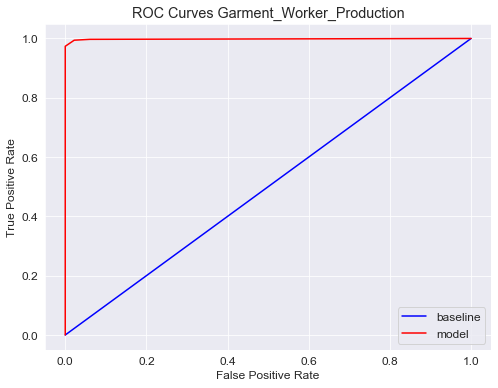

In [116]:
train_probs = random_forest_model.predict_proba(X_train)[:,1] 
probs = random_forest_model.predict_proba(X_test)[:,1]
train_predictions = random_forest_model.predict(X_train)

evaluate_model(y_pred,probs,train_predictions,train_probs,"Garment_Worker_Production") # Auc and ROC Curve

### Decision Tree on Probablities

In [117]:
X_train_new_df = pd.DataFrame(X_train,columns=over_sample_data.drop("Class",1).columns) #New Data Preparation
X_test_new_df = pd.DataFrame(X_test,columns=over_sample_data.drop("Class",1).columns) # For test 

In [118]:
predicted_probability = random_forest_model.predict_proba(X_train_new_df) # Calculating the Probabilities

In [119]:
# Creating New Target Variables for Multiclass Decision Tree
X_train_new_df['class_0'] =predicted_probability[:,0]
X_train_new_df['class_1'] =predicted_probability[:,1]
X_train_new_df['new_class'] = X_train_new_df[['class_0','class_1']].astype('str').agg('-'.join, axis=1)
X_train_new_df.drop(['class_0','class_1'],1,inplace=True)

In [120]:
# Label Encoding on training and testing data
for attribute in X_train_new_df.columns:
    label_encoder = LabelEncoder()
    X_train_new_df[attribute]=label_encoder.fit_transform(X_train_new_df[attribute])

In [121]:
d_tree = DecisionTreeClassifier() # Decision Tree Classifier

In [122]:
predicted_probability_test = random_forest_model.predict_proba(X_test)

In [123]:
# Data Preparation for Test Data
X_test_new_df['class_0'] =predicted_probability_test[:,0]
X_test_new_df['class_1'] =predicted_probability_test[:,1]
X_test_new_df['new_class'] = X_test_new_df[['class_0','class_1']].astype('str').agg('-'.join, axis=1)
X_test_new_df.drop(['class_0','class_1'],1,inplace=True)

In [124]:
# Label Encoding on training and testing data
for attribute in X_train_new_df.columns:
    label_encoder = LabelEncoder()
    X_test_new_df[attribute]=label_encoder.fit_transform(X_test_new_df[attribute])

In [125]:
### Feature Scaling for training and testing data
scaler = StandardScaler()

X = scaler.fit_transform(X_train_new_df.drop('new_class',1))

In [126]:
d_tree.fit(X,X_train_new_df.new_class) ## Fitting Decision tree classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [127]:
scaler = StandardScaler()
x = scaler.fit_transform(X_test_new_df.drop('new_class',1))

In [128]:
decision_tree_pred = d_tree.predict(x) # Predicting Decision Tree Classifier

print(classification_report(X_test_new_df.new_class,decision_tree_pred)) # Classification Report of New Multiclass CLassifier

              precision    recall  f1-score   support

           0       0.66      0.83      0.74       187
           1       0.12      0.12      0.12        48
           2       0.11      0.17      0.13        36
           3       0.06      0.10      0.07        20
           4       0.00      0.00      0.00        18
           5       1.00      0.07      0.13        14
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         6
           8       0.07      0.13      0.10        15
           9       0.00      0.07      0.01        15
          10       0.00      0.00      0.00       341

    accuracy                           0.25       703
   macro avg       0.18      0.14      0.12       703
weighted avg       0.21      0.25      0.22       703



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [129]:
accuracy_score(X_test_new_df.new_class,decision_tree_pred) # Accuracy of multiclass

0.24751066856330015

In [130]:
d_tree.score(X,X_train_new_df.new_class)

1.0

In [131]:
## Parameters for Hyper Parameter Tunning
criterion=['gini', 'entropy']
max_depth=[i for i in range (2,100,5)]
min_samples_split=[i for i in range (2,100,5)]
min_samples_leaf=[i for i in range (2,20,2)]
param_grid={'max_depth':max_depth,
            'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'criterion':criterion}

#### Hyper Parameter tunning

In [132]:
random_cv = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, random_state=0,n_jobs = -1,cv = 350)

random_cv.fit(X,X_train_new_df.new_class)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=350.
  % (min_groups, self.n_splits)), Warning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=350, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best

In [133]:
random_cv.best_params_

{'min_samples_split': 57,
 'min_samples_leaf': 8,
 'max_depth': 37,
 'criterion': 'entropy'}

In [134]:
random_cv.best_score_ # Accuracy of Best Parameters

0.7859649122807018

## Decision Tree for Binary Classification

In [135]:
# Creating New Decision Tree classifier on base dataset.
new_d_tree = DecisionTreeClassifier(**random_cv.best_params_)

new_d_tree.fit(X_train,y_train)

new_d_tree.score(X_train,y_train)

new_d_tree.score(X_test,y_test) # 

0.8378378378378378

Recall Baseline: 1.0 Test: 0.91 Train: 0.87
Precision Baseline: 0.49 Test: 1.0 Train: 0.88
Roc Baseline: 0.5 Test: 0.9 Train: 0.96


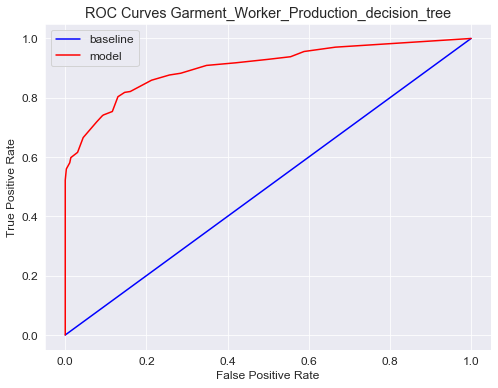

In [136]:
train_probs = new_d_tree.predict_proba(X_train)[:,1] 
probs = new_d_tree.predict_proba(X_test)[:,1]
train_predictions = new_d_tree.predict(X_train)

evaluate_model(y_pred,probs,train_predictions,train_probs,"Garment_Worker_Production_decision_tree") # Auc and ROC Curve

# 2nd Dataset

### Chronic Kidney Disease Data Description:
    1.Age(numerical)     age in years
    2.Blood Pressure(numerical)     bp in mm/Hg
    3.Specific Gravity(nominal)    sg - (1.005,1.010,1.015,1.020,1.025)
    4.Albumin(nominal)    al - (0,1,2,3,4,5)
    5.Sugar(nominal)    su - (0,1,2,3,4,5)
    6.Red Blood Cells(nominal)    rbc - (normal,abnormal)
    7.Pus Cell (nominal)    pc - (normal,abnormal)
    8.Pus Cell clumps(nominal)    pcc - (present,notpresent)
    9.Bacteria(nominal)    ba - (present,notpresent)
    10.Blood Glucose Random(numerical)    bgr in mgs/dl
    11.Blood Urea(numerical)    bu in mgs/dl
    12.Serum Creatinine(numerical)    sc in mgs/dl
    13.Sodium(numerical)    sod in mEq/L
    14.Potassium(numerical)    pot in mEq/L
    15.Hemoglobin(numerical)    hemo in gms
    16.Packed Cell Volume(numerical)
    17.White Blood Cell Count(numerical)    wc in cells/cumm
    18.Red Blood Cell Count(numerical)    rc in millions/cmm
    19.Hypertension(nominal)    htn - (yes,no)
    20.Diabetes Mellitus(nominal)    dm - (yes,no)
    21.Coronary Artery Disease(nominal)    cad - (yes,no)
    22.Appetite(nominal)    appet - (good,poor)
    23.Pedal Edema(nominal)    pe - (yes,no)
    24.Anemia(nominal)    ane - (yes,no)
    25.Class (nominal)    class - (ckd,notckd)

In [137]:
data = []
with open('chronic_kidney_disease_full.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))


names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']
    
kidney_df = pd.DataFrame(data[145:], columns=names)

In [138]:
kidney_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,7800,5.2,yes,yes,no,good,no,no,ckd,None
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,6000,?,no,no,no,good,no,no,ckd,None
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,7500,?,no,yes,no,poor,no,yes,ckd,None
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,None
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,7300,4.6,no,no,no,good,no,no,ckd,None


In [139]:
kidney_df.drop('no_name',1,inplace=True)

In [140]:
kidney_df['class'].value_counts()

ckd       248
notckd    149
ckd\t       2
no          1
Name: class, dtype: int64

In [141]:
kidney_df[(kidney_df['class'] != "notckd") & (kidney_df['class']!="ckd")]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
37,72,80,?,?,?,?,?,notpresent,notpresent,137,...,28,6900,2.5,yes,yes,no,poor,no,yes,ckd\t
230,65,60,1.010,2,0,normal,abnormal,present,notpresent,192,...,?,9500,?,yes,yes,no,poor,no,no,ckd\t
369,75,70,1.020,0,0,normal,normal,notpresent,notpresent,107,...,46,10300,4.8,no,,no,no,good,no,no
400,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
401,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [142]:
kidney_df.drop([37,230,369,400,401],0,inplace=True)

In [143]:
# kidney_df.dropna(inplace=True)

In [144]:
kidney_df[kidney_df.age=="?"]['pc'].count()

9

In [145]:
kidney_df.shape

(397, 25)

In [146]:
for attribute in kidney_df.columns:
    if kidney_df[kidney_df[attribute]=="?"][attribute].count() > 0:
        kidney_df[attribute].replace("?",np.nan,inplace=True)


In [147]:
kidney_df.shape # Shape of the data 397 rows and 25 features

(397, 25)

In [148]:
kidney_df.info() # Data Types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 25 columns):
age      388 non-null object
bp       385 non-null object
sg       351 non-null object
al       352 non-null object
su       349 non-null object
rbc      246 non-null object
pc       333 non-null object
pcc      393 non-null object
ba       393 non-null object
bgr      353 non-null object
bu       378 non-null object
sc       380 non-null object
sod      310 non-null object
pot      309 non-null object
hemo     346 non-null object
pcv      328 non-null object
wbcc     292 non-null object
rbcc     268 non-null object
htn      395 non-null object
dm       395 non-null object
cad      395 non-null object
appet    396 non-null object
pe       396 non-null object
ane      396 non-null object
class    397 non-null object
dtypes: object(25)
memory usage: 80.6+ KB


In [149]:
kidney_df.isna().sum() # Checking NA Values

age        9
bp        12
sg        46
al        45
su        48
rbc      151
pc        64
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      51
pcv       69
wbcc     105
rbcc     129
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [150]:
kidney_df['age'] = pd.to_numeric(kidney_df['age'], errors='coerce')
kidney_df['bp'] = pd.to_numeric(kidney_df['bp'], errors='coerce')
kidney_df['sg'] = pd.to_numeric(kidney_df['sg'], errors='coerce')
kidney_df['al'] = pd.to_numeric(kidney_df['al'], errors='coerce')
kidney_df['su'] = pd.to_numeric(kidney_df['su'], errors='coerce')
kidney_df['bgr'] = pd.to_numeric(kidney_df['bgr'], errors='coerce')
kidney_df['bu'] = pd.to_numeric(kidney_df['bu'], errors='coerce')
kidney_df['sc'] = pd.to_numeric(kidney_df['sc'], errors='coerce')
kidney_df['sod'] = pd.to_numeric(kidney_df['sod'], errors='coerce')
kidney_df['pot'] = pd.to_numeric(kidney_df['pot'], errors='coerce')
kidney_df['hemo'] = pd.to_numeric(kidney_df['hemo'], errors='coerce')
kidney_df['pcv'] = pd.to_numeric(kidney_df['pcv'], errors='coerce')
kidney_df['wbcc'] = pd.to_numeric(kidney_df['wbcc'], errors='coerce')
kidney_df['rbcc'] = pd.to_numeric(kidney_df['rbcc'], errors='coerce')

In [151]:
for attribute in kidney_df.columns:
    if kidney_df[attribute].dtype =="O":
        temp = kidney_df[attribute].value_counts().index.to_list()[0]
#         print(temp)
        kidney_df[attribute].fillna(temp,inplace=True)
#         print(attribute , "Yes")
        
    else:
        temp = kidney_df[attribute].median()
        kidney_df[attribute].fillna(temp,inplace=True)
#         print(attribute , "No")

In [152]:
kidney_df.describe() # Univariate Analysis

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,51.395466,76.624685,1.017720,0.901763,0.397985,145.060453,56.793955,3.004912,137.625945,4.580353,12.546725,39.090680,8293.954660,4.743073
std,16.957233,13.509918,0.005438,1.315380,1.043400,75.483167,49.538083,5.648671,9.226075,2.831464,2.722489,8.166626,2535.468344,0.837073
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.900000,34.000000,7000.000000,4.500000
50%,54.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,150.000000,61.000000,2.700000,141.000000,4.800000,14.700000,44.000000,9300.000000,5.100000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


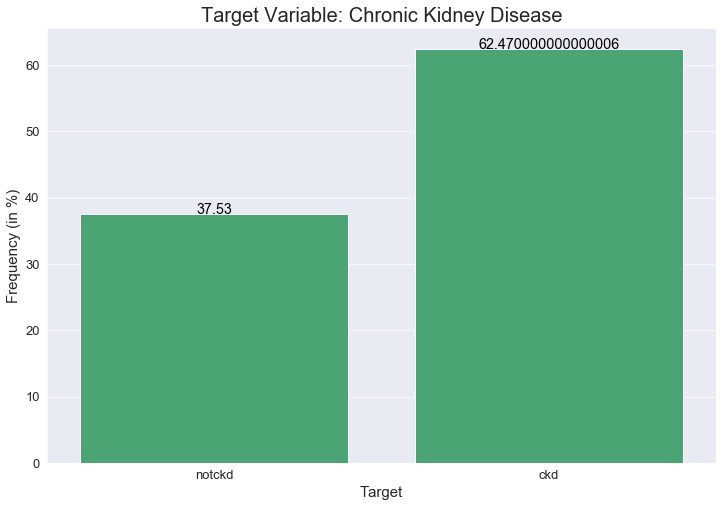

In [153]:
groupedvalues = kidney_df['class'].value_counts(normalize=True,ascending=True).reset_index()

groupedvalues['Class'] = round(groupedvalues['class'],4)*100

groupedvalues

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
bar=sns.barplot('index','Class',data=groupedvalues,color="mediumseagreen")
plt.title('Target Variable: Chronic Kidney Disease',fontsize=20)
plt.xlabel("Target",fontsize=15)
plt.ylabel("Frequency (in %)",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

for index,row in groupedvalues.iterrows():
    bar.text(row.name,row.Class,row.Class,color='black',ha='center',size='large')


fig = bar.get_figure()
fig.savefig("output_tmp_2.png")

In [154]:
categorical_feature = [feature for feature in kidney_df.columns if kidney_df[feature].dtypes == 'O'] # Categorical

In [155]:
for attribute in categorical_feature:
    label_encoder = LabelEncoder()
    kidney_df[attribute]=label_encoder.fit_transform(kidney_df[attribute]) # Label Encoder

In [156]:
X = kidney_df.drop('class',1) # Independent Variable
y = kidney_df['class'] # Dependent Variable

In [157]:
scaler = StandardScaler() # Scaler

In [158]:
X = scaler.fit_transform(X) 

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Modeling : Random Forest

In [160]:
random_forest_model_2 = RandomForestClassifier(random_state=40)  # Random Forest

In [161]:
random_forest_model_2.fit(X_train,y_train) # Model Fit

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [162]:
y_pred = random_forest_model_2.predict(X_test) # Prediction

In [163]:
print(classification_report(y_test,y_pred,target_names=["ckd","Notckd"])) # Classification Report

              precision    recall  f1-score   support

         ckd       0.99      0.99      0.99        79
      Notckd       0.98      0.98      0.98        53

    accuracy                           0.98       132
   macro avg       0.98      0.98      0.98       132
weighted avg       0.98      0.98      0.98       132



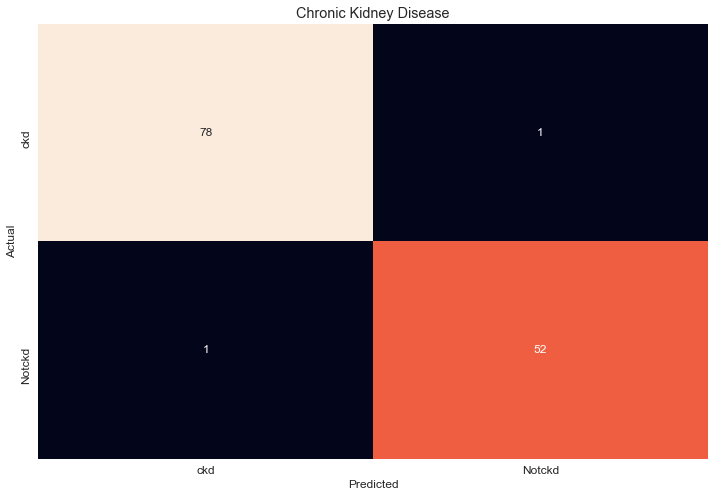

In [164]:
plt.figure(figsize=(12,8))
sns_plot = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False,xticklabels=["ckd","Notckd"],yticklabels=["ckd","Notckd"])
plt.title("Chronic Kidney Disease")
plt.xlabel("Predicted")
plt.ylabel("Actual")
fig = sns_plot.get_figure()
# fig.savefig("output_2.png")
plt.show()

In [165]:
print(confusion_matrix(y_test,y_pred)) # Confusion Matrix

[[78  1]
 [ 1 52]]


In [166]:
print(accuracy_score(y_test,y_pred)) # Test Accuracy

0.9848484848484849


In [167]:
random_forest_model_2.score(X_train,y_train) # Train Accuracy

1.0

Recall Baseline: 1.0 Test: 0.98 Train: 1.0
Precision Baseline: 0.4 Test: 0.98 Train: 1.0
Roc Baseline: 0.5 Test: 1.0 Train: 1.0


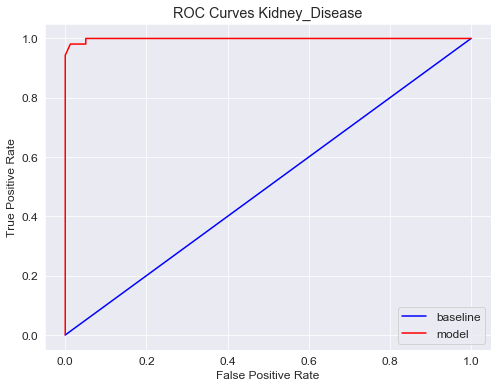

In [168]:
train_probs = random_forest_model_2.predict_proba(X_train)[:,1] 
probs = random_forest_model_2.predict_proba(X_test)[:,1]
train_predictions = random_forest_model_2.predict(X_train)

evaluate_model(y_pred,probs,train_predictions,train_probs,"Kidney_Disease") ## ROC Curve

### Decision Tree: Multiclass Dataset

In [169]:
X_train_new_df_2 = pd.DataFrame(X_train,columns=kidney_df.drop("class",1).columns) # Data Preparation
X_test_new_df_2 = pd.DataFrame(X_test,columns=kidney_df.drop("class",1).columns) 

In [170]:
# Preparing Data for Multiclass Decision Tree
pred_prob = random_forest_model_2.predict_proba(X_train_new_df_2)

X_train_new_df_2['class_0'] =pred_prob[:,0]
X_train_new_df_2['class_1'] =pred_prob[:,1]

In [171]:
X_train_new_df_2['new_class'] = X_train_new_df_2[['class_0','class_1']].astype('str').agg('-'.join, axis=1)

In [172]:
X_train_new_df_2.drop(['class_0','class_1'],1,inplace=True)

In [173]:
pred_prob = random_forest_model_2.predict_proba(X_test)

In [174]:
X_test_new_df_2['class_0'] =pred_prob[:,0]
X_test_new_df_2['class_1'] =pred_prob[:,1]

In [175]:
X_test_new_df_2['new_class'] = X_test_new_df_2[['class_0','class_1']].astype('str').agg('-'.join, axis=1)

In [176]:
X_test_new_df_2.drop(['class_0','class_1'],1,inplace=True)

In [177]:
# Label Encoding for Training and testing 
for attribute in X_test_new_df_2.columns:
    label_encoder = LabelEncoder()
    X_train_new_df_2[attribute]=label_encoder.fit_transform(X_train_new_df_2[attribute])

In [178]:
for attribute in X_test_new_df_2.columns:
    label_encoder = LabelEncoder()
    X_test_new_df_2[attribute]=label_encoder.fit_transform(X_test_new_df_2[attribute])

In [179]:
# Feature Scaling
scaler = StandardScaler()

X = scaler.fit_transform(X_train_new_df_2.drop('new_class',1))

In [180]:
d_tree = DecisionTreeClassifier() # Decision Tree classifier

In [181]:
d_tree.fit(X,X_train_new_df_2.new_class)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [182]:
scaler = StandardScaler()

x = scaler.fit_transform(X_test_new_df_2.drop('new_class',1))

d_pred = d_tree.predict(x) 

In [183]:
print(classification_report(X_test_new_df_2.new_class,d_pred)) # Classification report for Multiclass

              precision    recall  f1-score   support

           0       0.93      0.73      0.82        37
           1       0.25      0.43      0.32         7
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.07      1.00      0.12         1
           7       0.04      0.50      0.08         6
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        59

    accuracy                           0.26       132
   macro avg       0.13      0.27      0.13       132
weighted avg       0.28      0.26      0.25       132



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [184]:
accuracy_score(X_test_new_df_2.new_class,d_pred) # Accuracy on Testing Data

0.25757575757575757

In [185]:
d_tree.score(X,X_train_new_df_2.new_class)

1.0

### Hyper Parameter Tunning

In [186]:
random_cv = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, random_state=0,n_jobs = -1,cv = 100)

random_cv.fit(X,X_train_new_df_2.new_class)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=100.
  % (min_groups, self.n_splits)), Warning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=100, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best

In [187]:
random_cv.best_params_

{'min_samples_split': 67,
 'min_samples_leaf': 6,
 'max_depth': 22,
 'criterion': 'entropy'}

In [188]:
random_cv.best_score_ # Accuracy of Best Parameters

0.8188679245283019

### Decision Tree : Binary Classification

In [212]:
new_decision_tree_2 = DecisionTreeClassifier(**random_cv.best_params_) # Using Best Parameter 

new_decision_tree_2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=22,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=67,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [213]:
new_decision_tree_2.score(X_train,y_train)

0.9811320754716981

In [214]:
new_decision_tree_2.score(X_test,y_test) # Testing Accuracy on Best Parameter Decision Tree on Base Data

0.9696969696969697

Recall Baseline: 1.0 Test: 0.98 Train: 0.97
Precision Baseline: 0.4 Test: 0.98 Train: 0.98
Roc Baseline: 0.5 Test: 0.99 Train: 1.0


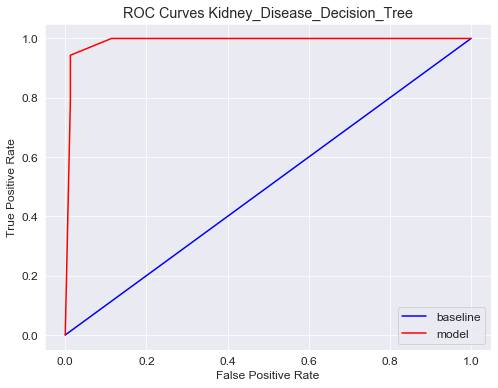

In [215]:
train_probs = new_decision_tree_2.predict_proba(X_train)[:,1] 
probs = new_decision_tree_2.predict_proba(X_test)[:,1]
train_predictions = new_decision_tree_2.predict(X_train)

evaluate_model(y_pred,probs,train_predictions,train_probs,"Kidney_Disease_Decision_Tree") ## ROC Curve

# 3rd Credit Approval

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)


In [189]:
data = pd.read_csv("crx.data",
           names =["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15","A16"] )

In [190]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [191]:
data.isna().sum() # Na Values

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [192]:
data.A16.value_counts() # Target Imbalance

-    383
+    307
Name: A16, dtype: int64

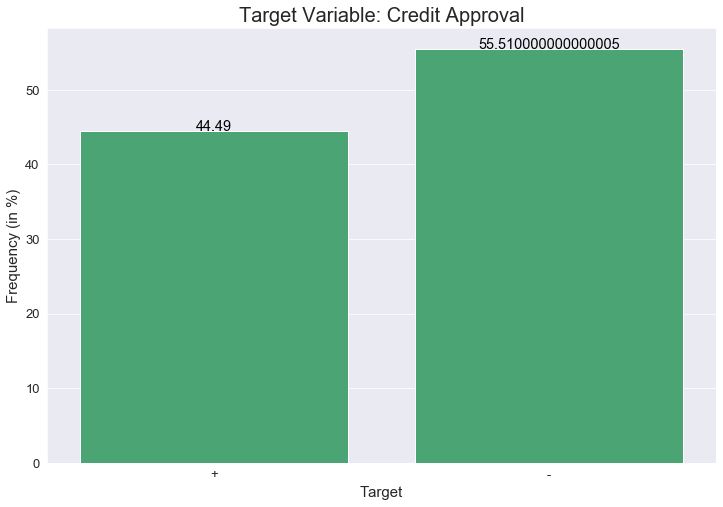

In [193]:
groupedvalues = data['A16'].value_counts(normalize=True,ascending=True).reset_index()

groupedvalues['Class'] = round(groupedvalues['A16'],4)*100

groupedvalues

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
bar=sns.barplot('index','Class',data=groupedvalues,color="mediumseagreen")
plt.title('Target Variable: Credit Approval',fontsize=20)
plt.xlabel("Target",fontsize=15)
plt.ylabel("Frequency (in %)",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

for index,row in groupedvalues.iterrows():
    bar.text(row.name,row.Class,row.Class,color='black',ha='center',size='large')


fig = bar.get_figure()
fig.savefig("output_tmp_3.png")

In [194]:
data.describe() # Univariate Analysis

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     690 non-null object
A2     690 non-null object
A3     690 non-null float64
A4     690 non-null object
A5     690 non-null object
A6     690 non-null object
A7     690 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    690 non-null object
A15    690 non-null int64
A16    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [196]:
Categorical = [feature for feature in data.columns if data[feature].dtypes == 'O'] # Categorical Feature
# Label Encoding
for attribute in Categorical:
    label_encoder = LabelEncoder()
    data[attribute]=label_encoder.fit_transform(data[attribute])

In [197]:
X = data.drop('A16',1) # Independent Feature
y = data.A16 # Dependent Feature

In [198]:
scaler = StandardScaler() # Scaler

In [199]:
X = scaler.fit_transform(X)

In [210]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Modeling: Random Forest

In [211]:
random_forest_model_3 = RandomForestClassifier(random_state=40) # Random Forest

In [212]:
random_forest_model_3.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [213]:
y_pred = random_forest_model_3.predict(X_test)

In [214]:
print(classification_report(y_test,y_pred,target_names=["+","-"])) # Classification Report

              precision    recall  f1-score   support

           +       0.83      0.84      0.84       103
           -       0.87      0.86      0.86       125

    accuracy                           0.85       228
   macro avg       0.85      0.85      0.85       228
weighted avg       0.85      0.85      0.85       228



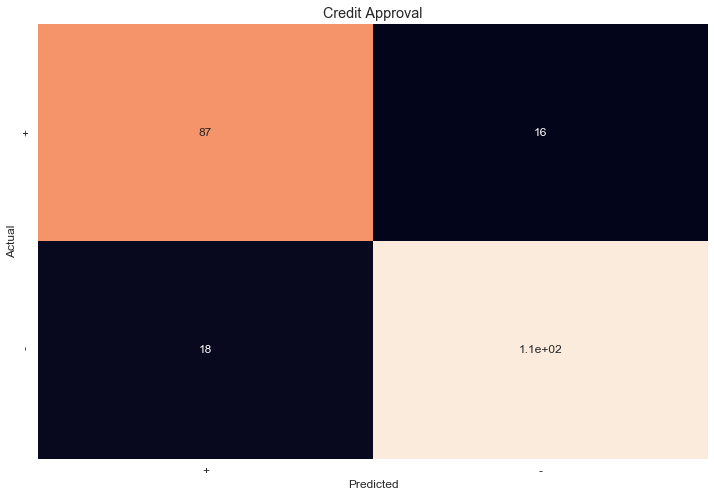

In [215]:
plt.figure(figsize=(12,8))
sns_plot = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False,xticklabels=["+","-"],yticklabels=["+","-"])
plt.title("Credit Approval")
plt.xlabel("Predicted")
plt.ylabel("Actual")
fig = sns_plot.get_figure()
fig.savefig("output_2.png")
plt.show()

In [216]:
print(confusion_matrix(y_test,y_pred)) # Confusion Matrix

[[ 87  16]
 [ 18 107]]


In [217]:
print(f"Random Forest Classifier testing Accuracy: {round(accuracy_score(y_test,y_pred),4)*100} %") # Test Accuracy

Random Forest Classifier testing Accuracy: 85.09 %


In [218]:
print(f"Random Forest Classifier training Accuracy: {round(random_forest_model_3.score(X_train,y_train),4)*100} %") # Training Accuracy

Random Forest Classifier training Accuracy: 98.7 %


Recall Baseline: 1.0 Test: 0.86 Train: 0.99
Precision Baseline: 0.55 Test: 0.87 Train: 0.98
Roc Baseline: 0.5 Test: 0.91 Train: 1.0


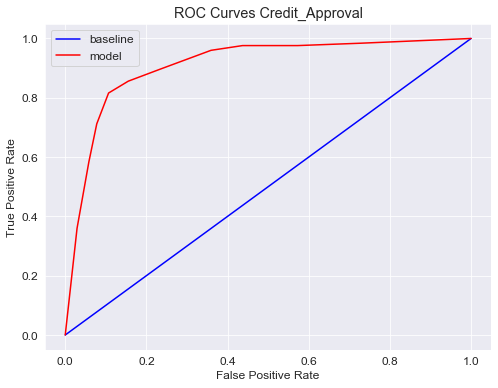

In [219]:
train_probs = random_forest_model_3.predict_proba(X_train)[:,1] 
probs = random_forest_model_3.predict_proba(X_test)[:,1]
train_predictions = random_forest_model_3.predict(X_train)

evaluate_model(y_pred,probs,train_predictions,train_probs,"Credit_Approval") # ROC Curve

In [220]:
## Decision Tree

In [221]:
# Data Preparation
X_train_new_df_3 = pd.DataFrame(X_train,columns=data.drop("A16",1).columns)
X_test_new_df_3 = pd.DataFrame(X_test,columns=data.drop("A16",1).columns)

In [222]:
pred_prob = random_forest_model_3.predict_proba(X_train_new_df_3)

In [223]:
X_train_new_df_3['class_0'] =pred_prob[:,0]
X_train_new_df_3['class_1'] =pred_prob[:,1]

In [224]:
X_train_new_df_3['new_y'] = X_train_new_df_3[['class_0','class_1']].astype('str').agg('-'.join, axis=1)

In [225]:
X_train_new_df_3.drop(['class_0','class_1'],1,inplace=True)

In [226]:
pred_prob = random_forest_model_3.predict_proba(X_test)

In [227]:
X_test_new_df_3['class_0'] =pred_prob[:,0]
X_test_new_df_3['class_1'] =pred_prob[:,1]

In [228]:
X_test_new_df_3['new_y'] = X_test_new_df_3[['class_0','class_1']].astype('str').agg('-'.join, axis=1)

X_test_new_df_3.drop(['class_0','class_1'],1,inplace=True)

In [229]:
# Label Encoder
for attribute in X_train_new_df_3.columns:
    label_encoder = LabelEncoder()
    X_train_new_df_3[attribute]=label_encoder.fit_transform(X_train_new_df_3[attribute])

for attribute in X_train_new_df_3.columns:
    label_encoder = LabelEncoder()
    X_test_new_df_3[attribute]=label_encoder.fit_transform(X_test_new_df_3[attribute])

In [230]:
# Standard Scaler
scaler = StandardScaler()

X = scaler.fit_transform(X_train_new_df_3.drop('new_y',1))

In [231]:
d_tree = DecisionTreeClassifier() # Decision Tree

### Decision Tree : Multiclass Classification

In [232]:
d_tree.fit(X,X_train_new_df_3.new_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [233]:
scaler = StandardScaler()

x = scaler.fit_transform(X_test_new_df_3.drop('new_y',1)) # Scaling Test Data

In [234]:
d_pred = d_tree.predict(x)

In [235]:
print(classification_report(X_test_new_df_3.new_y,d_pred)) # Classification Report 

              precision    recall  f1-score   support

           0       0.51      0.73      0.60        48
           1       0.40      0.32      0.36        31
           2       0.11      0.06      0.07        18
           3       0.14      0.06      0.09        16
           4       0.29      0.20      0.24        10
           5       0.00      0.00      0.00        13
           6       0.20      0.05      0.08        21
           7       0.25      0.10      0.14        10
           8       0.12      0.14      0.13        14
           9       0.06      0.12      0.08        17
          10       0.39      0.67      0.49        30

    accuracy                           0.33       228
   macro avg       0.22      0.22      0.21       228
weighted avg       0.29      0.33      0.29       228



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [236]:
accuracy_score(X_test_new_df_3.new_y.values,d_pred) # Accuracy before parameter tunning on Multiclass Decision Tree

0.32894736842105265

In [237]:
d_tree.score(X,X_train_new_df_3.new_y)

1.0

### Hyper Parameter Tunning

In [238]:
random_cv = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, random_state=0,n_jobs = -1,cv = 100)

random_cv.fit(X,X_train_new_df_3.new_y)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=100.
  % (min_groups, self.n_splits)), Warning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=100, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best

In [239]:
random_cv.best_params_

{'min_samples_split': 67,
 'min_samples_leaf': 14,
 'max_depth': 27,
 'criterion': 'gini'}

In [240]:
random_cv.best_score_ # Accuracy of Best Parameters

0.49567099567099565

### Decision Tree: Binary Classification

In [241]:
new_d_tree = DecisionTreeClassifier(**random_cv.best_params_) # Using Best Parameters

In [242]:
new_d_tree.fit(X_train,y_train) # Fitting Model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=27,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=14, min_samples_split=67,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [243]:
new_d_tree.score(X_train,y_train)

0.8679653679653679

In [244]:
new_d_tree.score(X_test,y_test) # Testing Data Accuracy

0.8377192982456141

Recall Baseline: 1.0 Test: 0.86 Train: 0.93
Precision Baseline: 0.55 Test: 0.87 Train: 0.85
Roc Baseline: 0.5 Test: 0.91 Train: 0.95


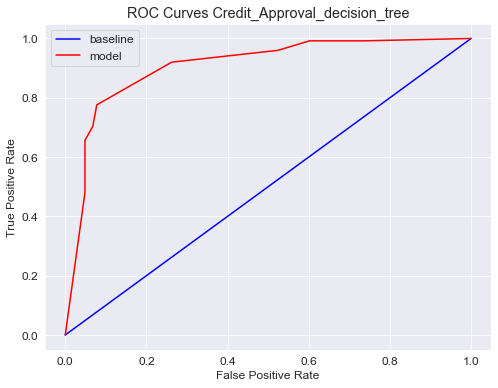

In [245]:
train_probs = new_d_tree.predict_proba(X_train)[:,1] 
probs = new_d_tree.predict_proba(X_test)[:,1]
train_predictions = new_d_tree.predict(X_train)

evaluate_model(y_pred,probs,train_predictions,train_probs,"Credit_Approval_decision_tree") # ROC Curve